<a href="https://colab.research.google.com/github/SamuelTelesSilva/toxic_comment_detection/blob/main/1_processamento_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação

In [ ]:
!pip install nltk
!pip install enelvo
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 27.5 MB 2.1 MB/s 
     |████████████████████████████████| 174 kB 42.6 MB/s 
     |████████████████████████████████| 285 kB 11.9 MB/s 
     |████████████████████████████████| 24.1 MB 1.8 MB/s 
     |████████████████████████████████| 14.8 MB 279 kB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=12b126c3f7f7cc59171ad81bc3f6175a52ad9f1137577c509c271e92ff571b8e
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
import emoji
from nltk import tokenize
from enelvo.normaliser import Normaliser
from wordcloud import WordCloud 


nltk.download('punkt')
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##DataSet part 1

PATH com o caminho do dataset

In [ ]:
PATH = "/content/drive/MyDrive/Pós-Graduação/Projeto de IA com Aprendizagem de Máquina/dataset/ToLD-BR.csv"

In [ ]:
told_br = pd.read_csv(PATH)

In [ ]:
told_br.shape

(21000, 7)

In [ ]:
told_br.head()

,text,homophobia,obscene,insult,racism,misogyny,xenophobia
0,Meu nivel de amizade com isis é ela ter meu in...,0.0,0.0,2.0,0.0,0.0,0.0
1,"rt @user @user o cara adultera dados, que fora...",0.0,0.0,1.0,0.0,0.0,0.0
2,@user @user @user o cara só é simplesmente o m...,0.0,2.0,1.0,0.0,0.0,0.0
3,eu to chorando vei vsf e eu nem staneio izone ...,0.0,1.0,0.0,0.0,0.0,0.0
4,Eleitor do Bolsonaro é tão ignorante q não per...,0.0,1.0,2.0,0.0,0.0,0.0


In [ ]:
told_br.columns[1:7]

Index(['homophobia', 'obscene', 'insult', 'racism', 'misogyny', 'xenophobia'], dtype='object')

Adicionando uma nova coluna com a soma das avaliações das outras colunas

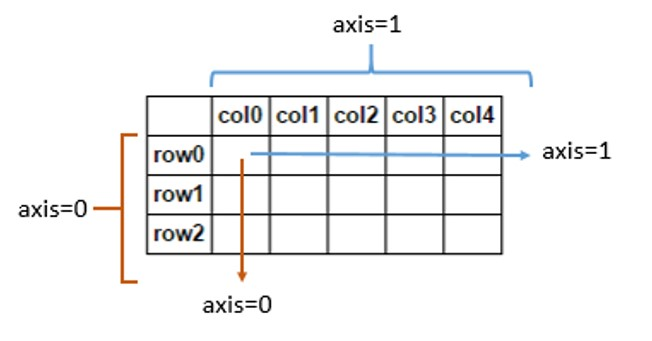

In [ ]:
told_br['sum'] = told_br.loc[0:,['homophobia' , 'obscene', 'insult', 'racism', 'misogyny', 'xenophobia']].sum(axis = 1)

Dividindo o dataset em dois dataset, o primeiro vai ser os comentarios que não são toxicos e o segundo os comentarios que são toxicos

In [ ]:
told_br

,text,homophobia,obscene,insult,racism,misogyny,xenophobia,sum
0,Meu nivel de amizade com isis é ela ter meu in...,0.0,0.0,2.0,0.0,0.0,0.0,2.0
1,"rt @user @user o cara adultera dados, que fora...",0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,@user @user @user o cara só é simplesmente o m...,0.0,2.0,1.0,0.0,0.0,0.0,3.0
3,eu to chorando vei vsf e eu nem staneio izone ...,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Eleitor do Bolsonaro é tão ignorante q não per...,0.0,1.0,2.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
20995,@user faz favor vai carai,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20996,só queria conhecer alguém que não conhece o he...,1.0,0.0,0.0,0.0,0.0,0.0,1.0
20997,"vcs militam na hora errada em cima de memes, p...",0.0,0.0,0.0,0.0,0.0,0.0,0.0
20998,@user porra any eu tava c dor de cabeca e fui ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_comentarios_nao_toxicos = told_br[told_br['sum'] == 0]
df_comentarios_toxicos = told_br[told_br['sum'] > 1]

In [ ]:
df_comentarios_nao_toxicos.shape

(11745, 8)

In [ ]:
df_comentarios_toxicos.head()

,text,homophobia,obscene,insult,racism,misogyny,xenophobia,sum
0,Meu nivel de amizade com isis é ela ter meu in...,0.0,0.0,2.0,0.0,0.0,0.0,2.0
2,@user @user @user o cara só é simplesmente o m...,0.0,2.0,1.0,0.0,0.0,0.0,3.0
4,Eleitor do Bolsonaro é tão ignorante q não per...,0.0,1.0,2.0,0.0,0.0,0.0,3.0
5,rt @user vai responder as outras 75 conversas ...,0.0,1.0,1.0,0.0,0.0,0.0,2.0
7,mais é ruim pra pedir desafio esse técnico do...,0.0,0.0,1.0,0.0,0.0,1.0,2.0


Colocando todos os comentarios em apenas uma string

In [ ]:
todos_comentarios = ""
for text in told_br.text:
  todos_comentarios += text + "\n\n"

In [ ]:
print(todos_comentarios)

**Stopwords (Palavras vazias)**

In [ ]:
palavras_vazias = nltk.corpus.stopwords.words('portuguese')
print(palavras_vazias)
print('Total:', len(palavras_vazias))

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
# adicionar várias palavra de uma vez no stopwords
palavras_vazias += ["https", "user", "rt", "username", "url",
                    "number", "retweeet", "hashtag", "kkk"]

In [ ]:
#Enelvo
normalizador = Normaliser()

In [ ]:
def pre_process(text):
  #utilizando o Enelvo para arrumar uma frase
  comentarios_norm_enelvo = normalizador.normalise(text)

  # tokeniza o texto, faz a capitalização e apresenta os tokens mais frequentes
  tokens = tokenize.word_tokenize(comentarios_norm_enelvo.lower(), language='portuguese')

  tokens_filtrados = [ token for token in tokens if token not in palavras_vazias if token not in string.punctuation ]


  tokens_filtrados2 = []

  for text1 in tokens_filtrados:
    tokens_filtrados2.append(emoji.replace_emoji(text1))

  text_norm = " ".join(tokens_filtrados2)
 
  return text_norm

In [ ]:
todos_comentarios_norm = pre_process(todos_comentarios)

In [ ]:
# tokeniza o texto e apresenta os tokens mais frequentes
tokens = tokenize.word_tokenize(todos_comentarios_norm.lower(), language='portuguese')
frequencia = nltk.FreqDist(tokens)
display(frequencia.most_common(150))

[('puta', 3266),
 ('pra', 3032),
 ('caralho', 2208),
 ('pariu', 2001),
 ('porra', 1989),
 ('vai', 1561),
 ('``', 1460),
 ('cu', 1225),
 ('porque', 1096),
 ('ser', 1067),
 ('vou', 933),
 ('cara', 857),
 ('gente', 827),
 ('to', 765),
 ('mano', 733),
 ('hoje', 725),
 ('nada', 718),
 ('dia', 696),
 ('tudo', 658),
 ('fazer', 637),
 ('agora', 633),
 ('foder', 607),
 ('ter', 604),
 ('filho', 571),
 ('ainda', 548),
 ('todo', 533),
 ('pau', 517),
 ('aqui', 513),
 ('merda', 505),
 ('vida', 483),
 ('casa', 482),
 ('ver', 478),
 ('bem', 472),
 ('coisa', 470),
 ('ai', 467),
 ('lixo', 439),
 ('ficar', 438),
 ('muita', 425),
 ('mundo', 423),
 ('aí', 419),
 ('bom', 417),
 ('pode', 415),
 ('deus', 415),
 ('queria', 409),
 ('demais', 398),
 ('amo', 396),
 ('mim', 392),
 ('quero', 389),
 ('tão', 382),
 ('nunca', 382),
 ('sim', 380),
 ('assim', 379),
 ('feio', 373),
 ('pessoa', 371),
 ('faz', 369),
 ('quer', 364),
 ('fica', 361),
 ('sei', 360),
 ('sempre', 360),
 ('ninguém', 349),
 ('pessoas', 347),
 ('to

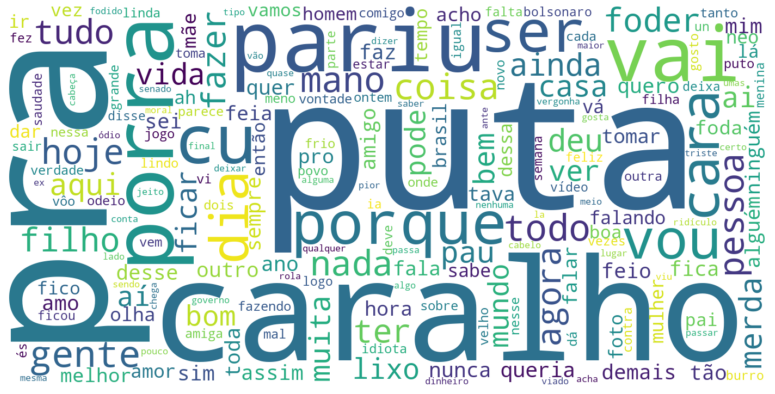

In [ ]:
wordcloud = WordCloud(background_color="white", width=1400, height=700, collocations=False).generate(todos_comentarios_norm)
fig = plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Dataset part 2

fazendo todos os passos anteriores mais deixando no dataframe

In [ ]:
told_br.text

0        Meu nivel de amizade com isis é ela ter meu in...
1        rt @user @user o cara adultera dados, que fora...
2        @user @user @user o cara só é simplesmente o m...
3        eu to chorando vei vsf e eu nem staneio izone ...
4        Eleitor do Bolsonaro é tão ignorante q não per...
                               ...                        
20995                            @user faz favor vai carai
20996    só queria conhecer alguém que não conhece o he...
20997    vcs militam na hora errada em cima de memes, p...
20998    @user porra any eu tava c dor de cabeca e fui ...
20999    saudades da iasmin de 2017 eu era gótica demai...
Name: text, Length: 21000, dtype: object

In [ ]:
told_br.head()

,text,homophobia,obscene,insult,racism,misogyny,xenophobia
0,Meu nivel de amizade com isis é ela ter meu in...,0.0,0.0,2.0,0.0,0.0,0.0
1,"rt @user @user o cara adultera dados, que fora...",0.0,0.0,1.0,0.0,0.0,0.0
2,@user @user @user o cara só é simplesmente o m...,0.0,2.0,1.0,0.0,0.0,0.0
3,eu to chorando vei vsf e eu nem staneio izone ...,0.0,1.0,0.0,0.0,0.0,0.0
4,Eleitor do Bolsonaro é tão ignorante q não per...,0.0,1.0,2.0,0.0,0.0,0.0


In [ ]:
def pre_process(text):
  #utilizando o Enelvo para arrumar uma frase
  comentarios_norm_enelvo = normalizador.normalise(text)

  # tokeniza o texto, faz a capitalização e apresenta os tokens mais frequentes
  tokens = tokenize.word_tokenize(comentarios_norm_enelvo.lower(), language='portuguese')

  tokens_filtrados = [ token for token in tokens if token not in palavras_vazias if token not in string.punctuation ]

 
  tokens_filtrados2 = []

  for text1 in tokens_filtrados:
    tokens_filtrados2.append(emoji.replace_emoji(text1))

  return tokens_filtrados2

In [ ]:
told_br.head()

,text,homophobia,obscene,insult,racism,misogyny,xenophobia
0,Meu nivel de amizade com isis é ela ter meu in...,0.0,0.0,2.0,0.0,0.0,0.0
1,"rt @user @user o cara adultera dados, que fora...",0.0,0.0,1.0,0.0,0.0,0.0
2,@user @user @user o cara só é simplesmente o m...,0.0,2.0,1.0,0.0,0.0,0.0
3,eu to chorando vei vsf e eu nem staneio izone ...,0.0,1.0,0.0,0.0,0.0,0.0
4,Eleitor do Bolsonaro é tão ignorante q não per...,0.0,1.0,2.0,0.0,0.0,0.0


In [ ]:
tokens_norm = []

for text in told_br.text:
  tokens_norm.append(pre_process(text))
   

In [ ]:
told_br['text_norm'] = tokens_norm

In [ ]:
told_br.head()

,text,homophobia,obscene,insult,racism,misogyny,xenophobia,text_norm
0,Meu nivel de amizade com isis é ela ter meu in...,0.0,0.0,2.0,0.0,0.0,0.0,"[nível, amizade, isis, ter, insta, ter, penso,..."
1,"rt @user @user o cara adultera dados, que fora...",0.0,0.0,1.0,0.0,0.0,0.0,"[cara, adultera, dados, desmascarados, ainda, ..."
2,@user @user @user o cara só é simplesmente o m...,0.0,2.0,1.0,0.0,0.0,0.0,"[cara, simplesmente, maior, vencedor, história..."
3,eu to chorando vei vsf e eu nem staneio izone ...,0.0,1.0,0.0,0.0,0.0,0.0,"[to, chorando, velho, vá, foder, enalteço, ozo..."
4,Eleitor do Bolsonaro é tão ignorante q não per...,0.0,1.0,2.0,0.0,0.0,0.0,"[eleitor, bolsonaro, tão, ignorante, percebeu,..."


In [ ]:
df_comentarios_nao_toxicos = told_br[told_br['sum'] == 0]
df_comentarios_toxicos = told_br[told_br['sum'] > 1]

In [ ]:
df_comentarios_nao_toxicos.loc[20997, 'text']

'vcs militam na hora errada em cima de memes, por isso que ngm suporta o jovem\nnão que esteja numa militância errada, mas porra militar em cima de meme é foda'

In [ ]:
df_comentarios_nao_toxicos.loc[20997, 'text_norm']

['militam',
 'hora',
 'errada',
 'cima',
 'menes',
 'ninguém',
 'suporta',
 'jovem',
 'militância',
 'errada',
 'porra',
 'militar',
 'cima',
 'meme',
 'foda']

In [ ]:
df_comentarios_toxicos.text_norm

0        [nível, amizade, isis, ter, insta, ter, penso,...
2        [cara, simplesmente, maior, vencedor, história...
4        [eleitor, bolsonaro, tão, ignorante, percebeu,...
5        [vai, responder, outras, conversas, cobrar, at...
7         [ruim, pra, pedir, desafio, técnico, azerbaijão]
                               ...                        
20980    [desgraça, vier, falar, comigo, novo, mando, t...
20981    [mina, pega, pia, sabendo, pia, namora, auge, ...
20983    [reclamam, boca, suja, desculpa, aí, vai, toma...
20988                [caralho, espaço, vírgula, aí, burro]
20990    [mochila, costas, radinho, cintura, bonezinho,...
Name: text_norm, Length: 4816, dtype: object

In [ ]:
todos_comentarios_toxicos = ""
for text in df_comentarios_toxicos.text_norm:
  for palavra in text:
    todos_comentarios_toxicos += palavra + "\n\n"


todos_comentarios_nao_toxicos = ""
for text in df_comentarios_nao_toxicos.text_norm:
  for palavra in text:
    todos_comentarios_nao_toxicos += palavra + "\n\n"


In [ ]:
print(len(todos_comentarios_toxicos))
print(len(todos_comentarios_nao_toxicos))

313859
769950


**Comentarios não toxicos**

In [ ]:
# tokeniza o texto e apresenta os tokens mais frequentes
tokens = tokenize.word_tokenize(todos_comentarios_nao_toxicos.lower(), language='portuguese')
frequencia = nltk.FreqDist(tokens)
display(frequencia.most_common(150))

[('pra', 1625),
 ('puta', 1271),
 ('pariu', 902),
 ('caralho', 789),
 ('``', 774),
 ('porra', 697),
 ('vai', 632),
 ('porque', 621),
 ('ser', 605),
 ('vou', 557),
 ('gente', 475),
 ('dia', 464),
 ('nada', 462),
 ('hoje', 456),
 ('to', 438),
 ('tudo', 403),
 ('fazer', 379),
 ('ter', 372),
 ('mano', 366),
 ('agora', 361),
 ('cara', 344),
 ('casa', 309),
 ('todo', 305),
 ('vida', 300),
 ('aqui', 296),
 ('ainda', 292),
 ('bem', 278),
 ('ver', 276),
 ('coisa', 276),
 ('pode', 266),
 ('muita', 262),
 ('neo', 262),
 ('bom', 259),
 ('ai', 251),
 ('queria', 251),
 ('mundo', 250),
 ('deus', 247),
 ('ficar', 246),
 ('mim', 246),
 ('amo', 237),
 ('nunca', 234),
 ('pessoas', 227),
 ('quero', 226),
 ('sim', 226),
 ('sei', 225),
 ('tão', 224),
 ('feio', 220),
 ('assim', 219),
 ('melhor', 218),
 ('demais', 216),
 ('sempre', 214),
 ('lixo', 213),
 ('aí', 208),
 ('pessoa', 208),
 ('fica', 201),
 ('faz', 199),
 ('acho', 194),
 ('alguém', 194),
 ('coisas', 193),
 ('amor', 191),
 ('feia', 191),
 ('ninguém'

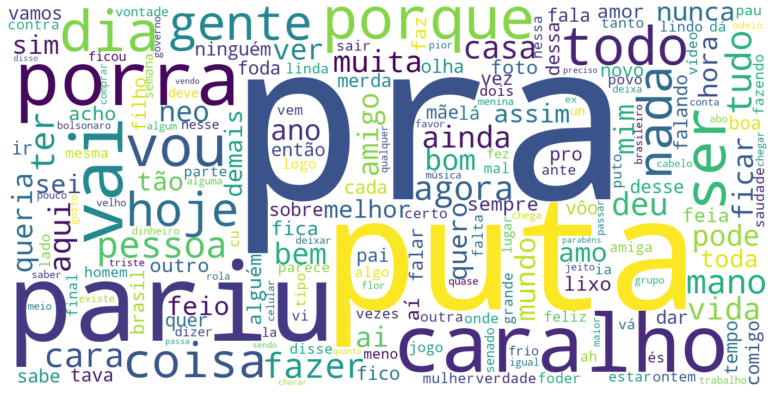

In [ ]:
wordcloud = WordCloud(background_color="white", width=1400, height=700, collocations=False).generate(todos_comentarios_nao_toxicos)
fig = plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Comentarios toxicos**

In [ ]:
# tokeniza o texto e apresenta os tokens mais frequentes
tokens = tokenize.word_tokenize(todos_comentarios_toxicos.lower(), language='portuguese')
frequencia = nltk.FreqDist(tokens)
display(frequencia.most_common(150))

[('puta', 968),
 ('cu', 818),
 ('pra', 762),
 ('vai', 638),
 ('caralho', 635),
 ('porra', 521),
 ('pariu', 390),
 ('``', 322),
 ('foder', 305),
 ('filho', 299),
 ('pau', 280),
 ('cara', 279),
 ('porque', 270),
 ('ser', 246),
 ('tomar', 211),
 ('merda', 193),
 ('vou', 180),
 ('mano', 175),
 ('gente', 165),
 ('todo', 139),
 ('to', 134),
 ('fazer', 134),
 ('agora', 130),
 ('ainda', 128),
 ('toma', 127),
 ('quer', 126),
 ('nada', 125),
 ('filha', 125),
 ('ver', 121),
 ('tudo', 121),
 ('lixo', 120),
 ('ter', 118),
 ('ai', 118),
 ('aí', 114),
 ('bem', 111),
 ('dia', 108),
 ('aqui', 104),
 ('faz', 101),
 ('viado', 98),
 ('quero', 97),
 ('ficar', 95),
 ('hoje', 95),
 ('vá', 95),
 ('coisa', 93),
 ('vida', 93),
 ('dar', 92),
 ('burro', 91),
 ('desse', 90),
 ('pessoa', 90),
 ('homem', 89),
 ('ah', 88),
 ('fala', 88),
 ('mundo', 88),
 ('idiota', 88),
 ('fica', 87),
 ('assim', 86),
 ('casa', 86),
 ('mulher', 86),
 ('pode', 85),
 ('deus', 85),
 ('boceta', 85),
 ('sim', 84),
 ('tão', 82),
 ('falar', 

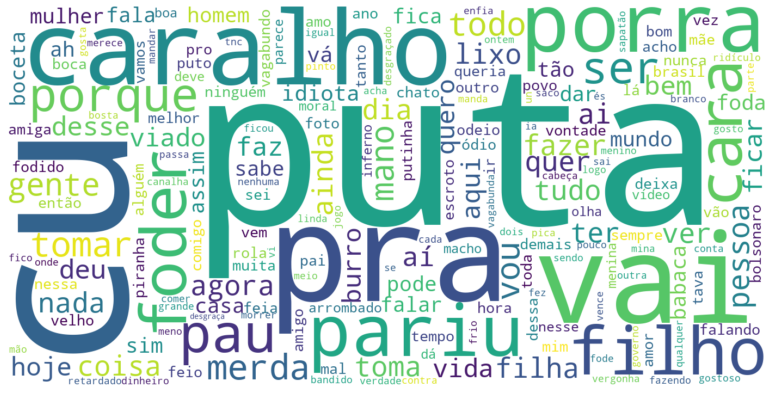

In [ ]:
wordcloud = WordCloud(background_color="white", width=1400, height=700, collocations=False).generate(todos_comentarios_toxicos)
fig = plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Forma errada, mesmas palavras que tem na parte toxica tem na parte Não toxica

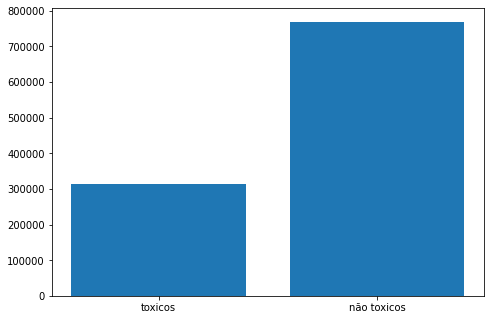

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

langs = ['toxicos','não toxicos']
students = [len(todos_comentarios_toxicos), len(todos_comentarios_nao_toxicos)]

ax.bar(langs,students)
plt.show()